<a href="https://colab.research.google.com/github/leonardochd/Regressao-com-dados-covid-19/blob/main/Regress%C3%A3o_com_os_Dados_sobre_a_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook de ensaios do teste de regressão com os dados da COVID-19
> Autor:
  - Leonardo Cherobim Dutra



> Se baseando nos seguintes códigos para referência:
  - https://colab.research.google.com/drive/1t7mLU--uXw7dmiTjJ9PecFStRENZdlk3#scrollTo=Q0lPRSSXnfu0
  - https://colab.research.google.com/drive/1eF-StolsVpddEysPMZQsfH1AMzyuGBN-#scrollTo=yXfHVZJiyGWs
  - https://colab.research.google.com/drive/1UWYqcdPSon5zSgZ0nDowp_a9X4AYNBVb#scrollTo=BLsUP4j9R3lR

##Dados


###Importação das bibliotecas dependentes

In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import random
import math
import time
import datetime
import operator
plt.style.use('seaborn-poster')
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")



###Aquisição dos dados

In [2]:
confirmados_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
mortes_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
ultimos_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2023.csv')

####Verificando os primeiros valores e os indices

In [3]:
confirmados_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [4]:
mortes_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [5]:
ultimos_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2023-01-02 04:20:57,33.93911,67.709953,207616,7849,NaN,NaN,Afghanistan,533.328662,3.780537
1,NaN,NaN,NaN,Albania,2023-01-02 04:20:57,41.15330,20.168300,333811,3595,NaN,NaN,Albania,11599.520467,1.076957
2,NaN,NaN,NaN,Algeria,2023-01-02 04:20:57,28.03390,1.659600,271229,6881,NaN,NaN,Algeria,618.523486,2.536971
3,NaN,NaN,NaN,Andorra,2023-01-02 04:20:57,42.50630,1.521800,47751,165,NaN,NaN,Andorra,61801.591924,0.345543
4,NaN,NaN,NaN,Angola,2023-01-02 04:20:57,-11.20270,17.873900,105095,1930,NaN,NaN,Angola,319.765542,1.836434


####Guardando as colunas dos confirmados e do nº de mortes

In [6]:
confirmados_cols = confirmados_df.keys()
mortes_cols = mortes_df.keys()

Verificando os indices guardados

In [7]:
confirmados_cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/24/22', '12/25/22', '12/26/22', '12/27/22', '12/28/22', '12/29/22',
       '12/30/22', '12/31/22', '1/1/23', '1/2/23'],
      dtype='object', length=1081)

####Guardando apenas as datas dos confirmados e mortes

In [8]:
confirmados = confirmados_df.loc[:, confirmados_cols[4]:]
mortes = mortes_df.loc[:,mortes_cols[4]:]

Verificando os indices

In [9]:
confirmados.keys()
# confirmados

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '12/24/22', '12/25/22', '12/26/22', '12/27/22', '12/28/22', '12/29/22',
       '12/30/22', '12/31/22', '1/1/23', '1/2/23'],
      dtype='object', length=1077)

In [10]:
num_datas = len(confirmados.keys())
ck = confirmados.keys()
dk = mortes.keys()

mundo_casos = []
total_mortes = []
taxa_mortalidade = []

for i in range(num_datas):
  confirmados_sum = confirmados[ck[i]].sum()
  mortes_sum = mortes[dk[i]].sum()

  mundo_casos.append(confirmados_sum)
  total_mortes.append(mortes_sum)

  # Calculando a taxa
  taxa_mortalidade.append(mortes_sum/confirmados_sum)

####Obtendo aumentos diários e médias móveis

In [11]:
def aumento_diario(data):
  d = []
  for i in range(len(data)):
    if i == 0:
      d.append(data[0])
    else:
      d.append(data[i]-data[i-1])
  return d

def media_movel(data, tam_janela):
  media_movel = []
  for i in range(len(data)):
    if i + tam_janela < len(data):
      media_movel.append(np.mean(data[i:i+tam_janela]))
    else:
      media_movel.append(np.mean(data[i:len(data)]))
  return media_movel

# tamanho da janela
janela = 7

# casos confirmados
mundo_aumento_diario = aumento_diario(mundo_casos)
mundo_media_confirmado = media_movel(mundo_casos, janela)
mundo_aumento_medio_diario = media_movel(mundo_aumento_diario, janela)

# mortes
mundo_mortes_diario = aumento_diario(total_mortes)
mundo_media_morte = media_movel(total_mortes, janela)
mundo_media_morte_diaria = media_movel(mundo_mortes_diario, janela)


####Criando uma matriz com as datas desde o inicio da contagem da pandemia (22/01/2020)

In [12]:
# dia que começou as contagens 22/01/2020
dias_desde_1_22 = np.array([i for i in range(len(ck))]).reshape(-1,1)
mundo_casos = np.array(mundo_casos).reshape(-1,1)
total_mortes = np.array(total_mortes).reshape(-1,1)

In [13]:
dias_no_futuro = 10
previsao_futuro = np.array([i for i in range(len(ck)+dias_no_futuro)]).reshape(-1,1)
datas_ajustada = previsao_futuro[:-10]

####Convertendo inteiro em datetime para melhor visualização

In [14]:
start = '1/22/2020'
start_data = datetime.datetime.strptime(start, '%m/%d/%Y')
dias_previsao_futuro = []
for i in range(len(previsao_futuro)):
  dias_previsao_futuro.append((start_data + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

##Treinamento de máquina

####Importando as Bibliotecas do sklearn

In [16]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV

####Utilizando o train_test_split para gerar as variaveis de treinamento e teste

Calculando a diferença de dias entre duas datas para tirar do modelo de treinamento

Tirando todos os dias até 01 de dezembro de 2022

In [31]:
data1 = datetime.datetime(2020,1,22)
data2 =  datetime.datetime(2022,12,1)

diferenca = data2 - data1
dias = diferenca.days
print("Numero de dias pulados: " + str(dias))

Numero de dias pulados: 1044


In [32]:
# pulando_dias = 922
pulando_dias = int(dias)
X_treino_confirmado, X_teste_confirmado, y_treino_confirmado, y_teste_confirmado = train_test_split(dias_desde_1_22[pulando_dias:], mundo_casos[pulando_dias:], test_size=0.07, shuffle=False)

###Modelos de regressão

####SVR (Support Vector Regression)

Encontrando os melhores parametros para gerar o modelo 

In [ ]:
c = [0.01, 0.1, 1]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]

svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking': shrinking}

svm = SVR(kernel='poly', degree=3)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_treino_confirmado, y_treino_confirmado)

svm_search.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


Apenas executando com os parametros já selecionados

In [ ]:
svm_confirmado = SVR(shrinking=True, kernel='poly', epsilon=1, degree=3, C=0.1)
svm_confirmado.fit(X_treino_confirmado, y_treino_confirmado)
svm_pred = svm_confirmado.predict(previsao_futuro)

Erro médio absoluto:  359186.0253644387
Erro médio quadrado:  188109484510.29044
r2:  0.15889648431206782


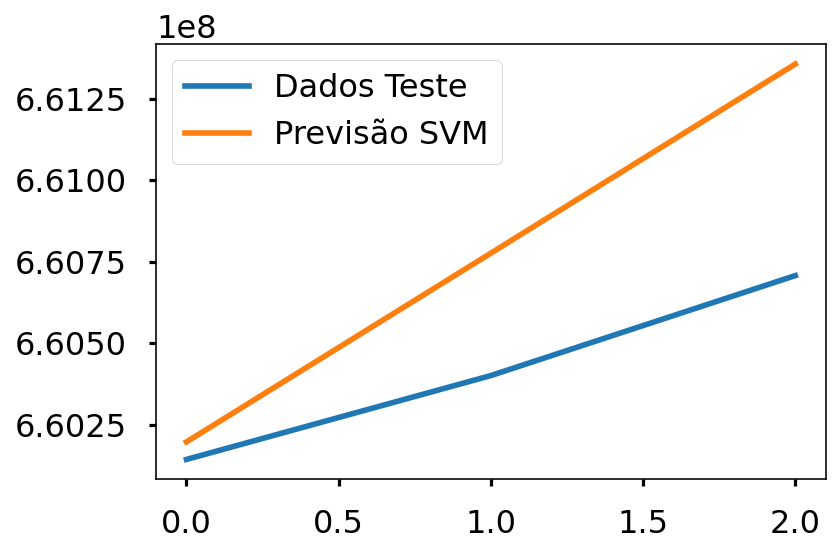

In [ ]:
svm_test_pred = svm_confirmado.predict(X_teste_confirmado)

plt.plot(y_teste_confirmado)
plt.plot(svm_test_pred)
plt.legend(['Dados Teste', 'Previsão SVM'])
print('Erro médio absoluto: ', mean_absolute_error(svm_test_pred, y_teste_confirmado))
print('Erro médio quadrado: ', mean_squared_error(svm_test_pred, y_teste_confirmado))
print('r2: ', r2_score(svm_test_pred, y_teste_confirmado))

####Random Forest Regressor

In [ ]:
metricas = [
  'r2',
  'neg_mean_absolute_error',
  'neg_mean_squared_error',
  'neg_mean_absolute_percentage_error',
  'max_error'
]

Aqui quero testar o utilizando de validação cruzada e também sem validação cruzada

Erro médio absoluto:  905314.6299999952
Erro médio quadrado:  907055643492.0283
r2:  0.0


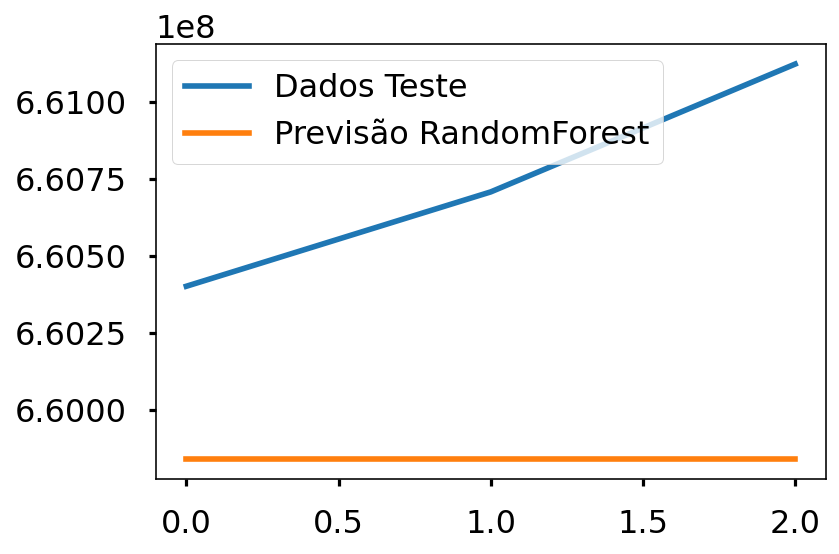

In [18]:
# regressao = GridSearchCV(RandomForestRegressor(random_state=42, n_estimators=100), param_grid={}, scoring=metricas, cv=5, refit='r2', n_jobs=-1)
# regressao.fit(X_treino_confirmado, y_treino_confirmado)
# pred1 = regressao.predict(previsao_futuro)

randomForest_confirmado = RandomForestRegressor(n_estimators=100, random_state=42)
randomForest_confirmado.fit(X_treino_confirmado, y_treino_confirmado)
random_prev = randomForest_confirmado.predict(previsao_futuro)

random_test_prev = randomForest_confirmado.predict(X_teste_confirmado)

plt.plot(y_teste_confirmado)
plt.plot(random_test_prev)
plt.legend(['Dados Teste', 'Previsão RandomForest'])
print('Erro médio absoluto: ', mean_absolute_error(random_test_prev, y_teste_confirmado))
print('Erro médio quadrado: ', mean_squared_error(random_test_prev, y_teste_confirmado))
print('r2: ', r2_score(random_test_prev, y_teste_confirmado))

####Regressão Linear

In [28]:
modelo_linear = LinearRegression(normalize=True, fit_intercept=False)
modelo_linear.fit(X_treino_confirmado, y_treino_confirmado)
pred_teste_linear = modelo_linear.predict(X_teste_confirmado)

pred_linear = modelo_linear.predict(previsao_futuro)

print('Erro médio absoluto: ', mean_absolute_error(pred_teste_linear, y_teste_confirmado))
print('Erro médio quadrado: ', mean_squared_error(pred_teste_linear, y_teste_confirmado))
print('r2: ', r2_score(pred_teste_linear, y_teste_confirmado))

Erro médio absoluto:  1389471.9693733056
Erro médio quadrado:  1974673049820.6492
r2:  -6.807510208865403


In [29]:
print(modelo_linear.coef_)

[[615937.92927384]]


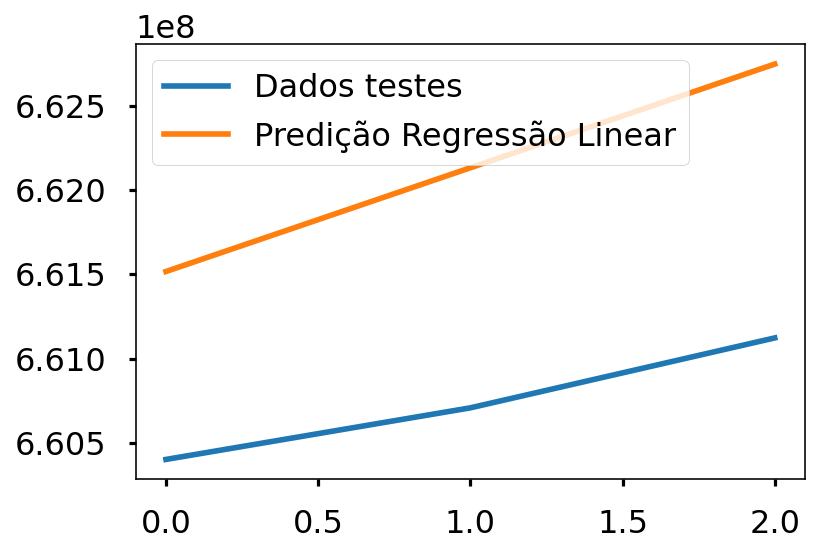

In [30]:
plt.plot(y_teste_confirmado)
plt.plot(pred_teste_linear)
plt.legend(['Dados testes', 'Predição Regressão Linear'])

####Transformando os dados para a Regressão Polinomial e a Regressão polinomial de aresta Bayesiana

In [20]:
poly = PolynomialFeatures(degree=3)
poly_X_treino_confirmado = poly.fit_transform(X_treino_confirmado)
poly_X_teste_confirmado = poly.fit_transform(X_teste_confirmado)
poly_previsao_futuro = poly.fit_transform(previsao_futuro)

bayesian_poly = PolynomialFeatures(degree=3)
bayesian_poly_X_treino_confirmado = bayesian_poly.fit_transform(X_treino_confirmado)
bayesian_poly_X_teste_confirmado = bayesian_poly.fit_transform(X_teste_confirmado)
bayesian_poly_previsao_futuro = bayesian_poly.fit_transform(previsao_futuro)

####Regressão Polinomial

In [24]:
# from sklearn import linear_model
modelo_polinomial = LinearRegression(normalize=True, fit_intercept=False)
modelo_polinomial.fit(poly_X_treino_confirmado, y_treino_confirmado)
pred_teste_polinomial = modelo_polinomial.predict(poly_X_teste_confirmado)
pred_polinomial = modelo_polinomial.predict(poly_previsao_futuro)

print('Erro médio absoluto: ', mean_absolute_error(pred_teste_polinomial, y_teste_confirmado))
print('Erro médio quadrado: ', mean_squared_error(pred_teste_polinomial, y_teste_confirmado))
print('r2: ', r2_score(pred_teste_polinomial, y_teste_confirmado))

Erro médio absoluto:  145445.88997395834
Erro médio quadrado:  27484390712.236744
r2:  0.7976543644256645


In [25]:
print(modelo_polinomial.coef_)

[[ 1.94224738e+11 -5.49792852e+08  5.19959087e+05 -1.63740448e+02]]


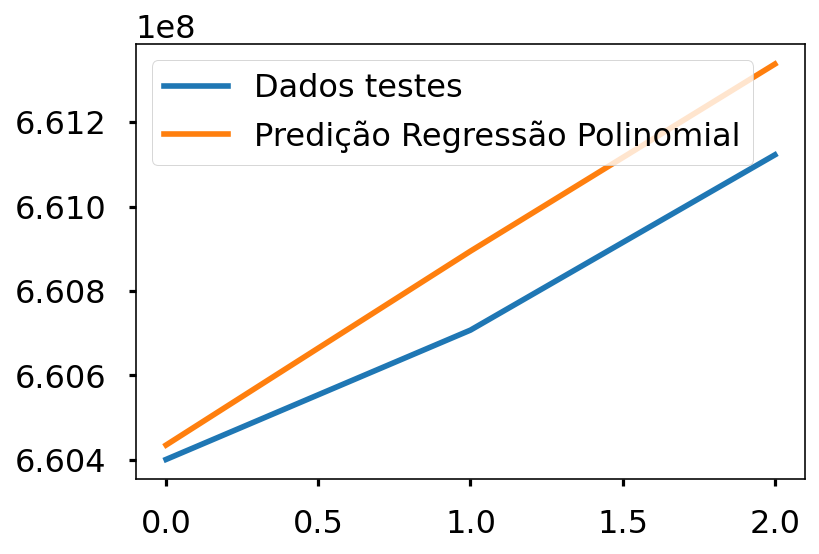

In [26]:
plt.plot(y_teste_confirmado)
plt.plot(pred_teste_polinomial)
plt.legend(['Dados testes', 'Predição Regressão Polinomial'])

#**Código Antigo**

###Exibindo os dados na série

Indexs, numero de linhas e colunas no dataframe e o tipo de dados.

In [ ]:
s_brazil

1/22/20            0
1/23/20            0
1/24/20            0
1/25/20            0
1/26/20            0
              ...   
12/26/22    36190389
12/27/22    36226287
12/28/22    36264721
12/29/22    36302415
12/30/22    36331281
Name: Brazil, Length: 1074, dtype: int64

Separando o indexes e os valores em variaveis separas para o proximo passo

In [ ]:
# extraindo as datas e o numero de casos
x = df_country.loc['Brazil'].index # indices (datas)
y = df_country.loc['Brazil'].values # valores (numero de casos por data)
print(x)
print()
print(y)

print(x[0][0])

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '12/21/22', '12/22/22', '12/23/22', '12/24/22', '12/25/22', '12/26/22',
       '12/27/22', '12/28/22', '12/29/22', '12/30/22'],
      dtype='object', length=1074)

[       0        0        0 ... 36264721 36302415 36331281]
1


##Aprendizado de Máquina

###Gerando as importações

####Validação Cruzada

In [ ]:
from sklearn.model_selection import GridSearchCV

####Pré-processamento

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding, LocallyLinearEmbedding, TSNE

####Regressores

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

####Métricas

In [ ]:
from sklearn import metrics

###Execução

####Primeiro modelo

Gerando o conjunto de teste e treino

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=10)

depth = 4
state = 10


In [ ]:
modelo1 = RandomForestRegressor(random_state=42, n_estimators=100)
modelo1.fit(x_treino, y_treino)
pred1 = modelo1.predict(x_teste)

modelo2 = LinearRegression()
modelo2.fit(x_treino, y_treino)
modelo2pred = modelo2.predict(x_teste)



print("Acurácia Random Forest:", metrics.accuracy_score(y_teste, pred1))
print("Acurácia Regressão Linear:", metrics.accuracy_score(y_teste, modelo2pred))

ValueError: ignored

####Fazendo a tabela para comparação dos resultados

In [ ]:
prePros = [
    None,
    {'metodo': MinMaxScaler, 'params': {}},
    {'metodo': Normalizer, 'params': {}},
    {'metodo': RobustScaler, 'params': {}},
]

tecnicas = [
    LinearRegression(),
    RandomForestRegressor(random_state=42, n_estimators=100),
    MLPRegressor(random_state=42),
    SVR(),
]